ref : https://www.cs.toronto.edu/~kriz/cifar.html

# DataSet 소개

## CIFAR-10   
`from tensorflow.keras.datasets import cifar10`
<img src="img/01.png"><br>
32*32의 크기로 되어 있으며, 60000장의 데이터셋<br>
10개의 클래스로 되어 있으며, 각 클래스의 경우에는 6000장의 이미지셋<br>
이 중에서 5000개는 학습용, 1000개는 테스트용으로 나누어져 있으며, 전체적으로는 5만장을 학습용, 1만장을 테스트용으로 되어 있음

## CIFAR-100
20개의 대분류 속에서 작게는 100개의 클래스의 분류로 되어 있음!<br>
`from tensorflow.keras.datasets import cifar100`
<img src="img/02.png">

## 특징   
MNIST와는 달리 실제 이미지 데이터로 되어 있어서, 데이터의 복잡도가 좀 더 높은 부분임. 그래서 특징을 검출하는데 난이도가 조금은 올라간 데이터 셋임!

# 기본적인 주요 내용들

## 학습의 속도를 향상해보자: Normalization

ref : https://www.youtube.com/watch?reload=9&v=UIp2CMI0748<br>
ref : http://aikorea.org/cs231n/neural-networks-2-kr/ <br>
### 기본 내용
- 정규화를 하지 않게 되면, 아래와 같이 타원의 구조가 되고, 그러면 cost function의 최소를 찾는 여행에 있어서 learning rate의 영향을 크게 받게 된다. 꼬불꼬불의 길을 가야한다.
- 정규화를 하게 되면, 아래와 같이 원의 구조가 되기 때문에, 어디로 가던지 일정 수준의 learning rate이면 다 최소에 쉽게 도달하는 구조가 되기에 좀 더 최소값에 도달하기가 수월하다. 
- 즉, 정규화를 해야지만이 cost의 구조가 최대한 원에 가까워 지도록 일정 범위에 모이게 되고, 그래야만 Gradient Descent의 기반의 접근이 보다 수월하게 동작을 할 가능성이 높게 된다.
- min/max를 사용을 하던지, mean-std를 사용하던지는 상관은 없음!!!
<img src="img/04.png">
<img src="img/03.png">

## Overfitting을 피해보자!! epoch이외에..

### Regularization

#### L2 

- 가장 일반적으로 사용되는 기법 <br>
- cost function에 가중치 제곱의 합을 추가하면서 이들에 대한 계수의 제약을 가함<br>
- 큰 값에 제약을 주면서, 작은 계수를 유지를 하면서 전체적으로 조절을 함<br>


In [1]:
from tensorflow.keras.regularizers import l2

#### L1

- 절대값으로 제약을 주는 것<br>
- LASOO에서와 같이 확실하게 계수를 0으로 만들면서 진행을 하기에 --> 노이즈 데이터에 상당히 강한 특징을 가짐.<br>
- 단,feature가 확실하게 정해진 것들에 대해서 하는 것이 아니라면 중간에 확 가중치들이 죽어버리기에 일반적인 경우에 있어서는 L1보다는 L2를 주로 많이 사용하게 된다.

In [8]:
from tensorflow.keras.regularizers import l1

#### etc: max Norm, Elastic Norm    
- Elastic 은 l1 , l2 모두 조절을 하는 것이며, max 는 일정 값을 정하기에 gradinet descent가 learning rate를 크게해도 잘 발산하지 않는 특성을 가짐.

In [9]:
from tensorflow.keras.regularizers import l1_l2

### DropOut   
- 간단한 방법으로 성능향상을 가지고 옴    
- L1/L2 등과 상호보완적으로 사용이 됨.

<img src="img/06.png">

In [7]:
from tensorflow.keras.layers import Dropout

### 일반론

- L2를 사용하는 것이 일반적으로 주로 사용을 함. 모든 가중치를 작게라도 살려두어서 나중에 학습을 통해 업데이트를 할 수 있는 여지를 남겨둠<br>
- 모든 레이어 이후에 dropout을 적용하는 것이 또한 일반적으로도 많이 사용이 된다.<br>
- dropout에서는 주로 0.5정도를 많이 사용되지만, 꼭은 아님;;;

## Batch Normalization

* Gradient Vanishing(loss function 의 기울기가 0에 근접하여 훈련하기 힘들어지는 문제점 ) / Gradient Exploding(에러가 축적이 되어서 overflow/NaN이 나타나는 현상)이 일어나지 않도록 하는 아이디어 중의 하나 <br>
-> 과거의 해결 방법 : Activation Function을 ReLU 등을 사용, 작은 learning rate 등으로 해결을 하려고 하였음.<br>

* BN 의 목적 : training 과정 자체를 안정화하여 학습 속도를 가속화하기 위해서 만들어짐.<br>
-> 신경망의 출력값은 다양한 입력 데이터에 따라서 쉽게 변화할 수 있는데, 매우 큰 범위의 값이 출력값들은 신경망을 불안하게 하여 성능 저하를 야기할 수 있음. <br>
-> BN은 아래와 같은 수식으로 출력값이 가질 수 있는 범위를 제한을 하고, 분포의 범위를 제한을 하면서 불확실성을 어느 정도 감소를 시켜줌. <br>
-> 이것을 사용하면 regularization / dropout은 사용하지 않아도 되어서 속도를 향상시킬 수 있다고는 함;;;<br>
-> `CNN + BN`에서 성능을 매우 크게 향상을 시키기는 하였음. 그러나 요즘 논문에서는 Internal Covariance Shift와는 상관이 없다는 이야기들도 많이 나오고 있음.....;;;; NN에서 논리적으로 수식적으로 그 효과를 증명하기는 어려움;;;; 대략 예상만 하고 있음;;
-> 단점 : batch_size=1이면 분산이 0이 되어서 정규화를 할 수 없다. 그래서 `적당히 큰 값을 해야한다.`<br>
- 단점 : RNN같이 각기 레이어마다 달라지는 모델에서는 사용하기 힘들다
<img src="img/07.png">

* `사용 방법` : Dense/Conv -> BatchNormalizaion() -> Activation()

In [10]:
from tensorflow.keras.layers import BatchNormalization

## Image Generator

- widrh_shift_range : 임의의 크기만큼 너비 이동 : 예)0.2이고, 이미지의 너비가 100이라먀ㅕㄴ -20~+20사이에서 이동을 시킨다.<br>
- height_shift_range : 임의의 크기만큰 높이 방향을 이동시킨다 : 예) 0.2이고 이미지의 높이가 100이라면 위아래로 -20~+20사잉 이동<br>
- brightness_range : 이미지의 밝기 정도 조절 : 예) (0.5, 1.5)이면 원본 대비 최대 50% 의 비율로 어둡거나 밝기 조정<br>
- shear_range : 시계 반대 방향으로 밀림 강도를 조절 : 예) 0.5이면 최대 50%의 비율로 시계 반대 방향으로 기울어지게 함.<br>
- zoom_range : 임이의 비율만큰 이미지를 확대, 축소 : 예) 0.5이면 0.5~1.5배의 범위에서 이미지의 크기를 조절함.<br>
- rotation_range : 이미지를 임의로 회전 : 예) 180이라면 0~180의 범위에서 이미지를 회전시킴<br>
- rescale : 이미지의 픽셀값의 크기를 조절을 함 : 예) 1/255이먀ㅕㄴ 각 픽셀값에 해당 값이 곱해진다.<br>
- fill_mode : 이미지의 변환 시 새로 생기는 픽셀을 채울 방법 : nearest, constant, reflect or wrap<br>
- horizontal_flip : 수평 뒤집기<br>
- vertical_flip : 수직 뒤집기<br>
- preprocessing_function : 사용자가 만드는 것<br>

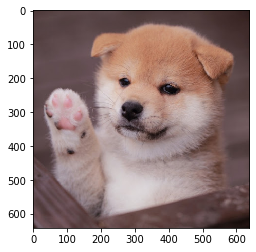

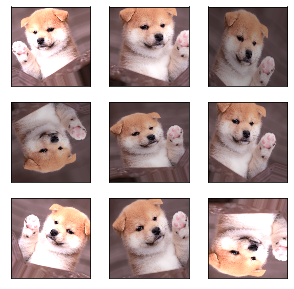

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

dog = img_to_array(load_img('test.png')).astype(np.uint8)
plt.figure()
plt.imshow(dog)

dog = dog.reshape((1, ) + dog.shape)
train_generator = train_datagen.flow(dog, batch_size = 1)

plt.figure(figsize = (5, 5))
for i in range(9):
    data = next(train_generator)
    image = data[0]
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

img = load_img("test.png")  # PIL 이미지
x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `temp/` 폴더에 저장합니다.
# temp 폴더가 없으면 생성을 해야함!!아니면 생성하도록 넣으면 됨!!!!

i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='temp', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # 이미지 20장을 생성하고 마칩니다


<img src="img/08.png">
<img src="img/09.png">

- 먼저 fit 명령어가 fit_generator로 바뀌게된다. <br>
ImageDataGenerator 클래스를 사용해서 증강시킨 이미지를 생성해 내 학습을 진행할 경우 반드시 fit 명령어를 fit_generator로 바꿔줘야한다.

- 그 다음 flow 명령어가 있는데, 이 flow 명령어는 data generator에게 증강시킨 이미지들의 batch 들을 생성하게 한다.

- steps_per_epoch는 하나의 epoch 마다 인코딩할 step의 수를 변수로 지정하여 넘겨주게 된다. <br>
이 값은 일반적으로 set에서의 고유 샘플(unique sample)들의 수를 batch의 크기로 나눈 값으로 설정된다. 예를 들어 x_train.shape[0]을 x_train 데이터셋에서의 고유 샘플로 처리하고 있는데,  이렇게 값을 넘겨주게되면 모델이 각 epoch마다 x_train.shape[0] 의 증강된 이미지를 확인하게 된다. 
x_train.shape[0]//batch_size

#  모델 만들기

## 데이터 불러오기

In [5]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [6]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 기본 전처리

In [7]:
# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


## 일반적인 구조

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding ="same", activation="relu", input_shape=(32,32,3)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=256, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])


In [12]:
# history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1094/1094 [==============================] - 72s 66ms/step - loss: 1.6284 - accuracy: 0.4120 - acc: 0.4120 - val_loss: 1.3736 - val_accuracy: 0.5121 - val_acc: 0.5121
Epoch 2/5
1094/1094 [==============================] - 72s 66ms/step - loss: 1.2723 - accuracy: 0.5467 - acc: 0.5467 - val_loss: 1.1938 - val_accuracy: 0.5690 - val_acc: 0.5690
Epoch 3/5
1094/1094 [==============================] - 74s 68ms/step - loss: 1.0973 - accuracy: 0.6143 - acc: 0.6143 - val_loss: 1.0672 - val_accuracy: 0.6173 - val_acc: 0.6173
Epoch 4/5
1094/1094 [==============================] - 73s 67ms/step - loss: 0.9714 - accuracy: 0.6591 - acc: 0.6591 - val_loss: 0.9740 - val_accuracy: 0.6557 - val_acc: 0.6557
Epoch 5/5
1094/1094 [==============================] - 73s 67ms/step - loss: 0.8695 - accuracy: 0.6948 - acc: 0.6948 - val_loss: 0.9488 - val_accuracy: 0.6666 - val_acc: 0.6666


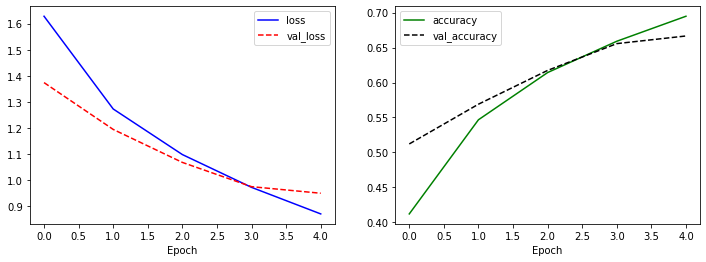

[0.9447376132011414, 0.6668999791145325, 0.6668999791145325]

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(x_test,y_test, verbose=0)

## regularization

In [ ]:
from tensorflow.keras.regularizers import l2


In [ ]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding ="same", activation="relu", input_shape=(32,32,3)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding ="same", activation="relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding ="same", activation="relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding ="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding ="same", activation="relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding="same"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=256, activation="relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))


model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])



In [ ]:
#history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(x_test,y_test, verbose=0)

##  DropOut

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ["accuracy"])

In [ ]:
#history = model.fit(x_train, y_train,epochs = 50,batch_size = 32,validation_data = (x_val, y_val))

history = model.fit(x_train, y_train,
                    epochs = 5,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(x_test,y_test, verbose=0)

## BatchNormal

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [ ]:
#history = model.fit(x_train, y_train,epochs = 50,batch_size = 32,validation_data = (x_val, y_val))
history = model.fit(x_train, y_train,epochs = 5,batch_size = 32,validation_data = (x_val, y_val))


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(x_test,y_test, verbose=0)

## 데이터 펌핑

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val,batch_size = batch_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [19]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size


In [ ]:
# history = model.fit(train_generator,
#                     epochs = 100,
#                     steps_per_epoch = get_step(len(x_train), batch_size),
#                     validation_data = val_generator,
#                     validation_steps = get_step(len(x_val), batch_size))


history = model.fit(train_generator,
                    epochs = 5,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Epoch 1/5
 801/1094 [====================>.........] - ETA: 28s - loss: 1.6653 - accuracy: 0.0991

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

model.evaluate(x_test,y_test, verbose=0)